In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
data=pd.read_csv("Acme_Attrition Data\WA_Fn-UseC_-HR-Employee-Attrition.csv")

<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\admin\AppData\Local\Temp\ipykernel_2012\481391233.py:1: SyntaxWarning: invalid escape sequence '\W'
  data=pd.read_csv("Acme_Attrition Data\WA_Fn-UseC_-HR-Employee-Attrition.csv")


# Data Preprocessing and Cleaning: 

## 1. Data Exploration

In [3]:
# for showing top 5 rows
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# For showing all columns name
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# for showing data information with null count and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# for showing summary statistics of data
data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


## 2. Data Cleaning

In [7]:
# for counting null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
data.dropna()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [9]:
# for counting duplicate values
data.duplicated().sum()

np.int64(0)

In [10]:
# drop irrelevent values
data.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

## 3. Data Encoding

In [12]:
data = pd.get_dummies(data, columns=[
    'JobRole', 'Department', 'EducationField', 'BusinessTravel'])
pd.DataFrame(data)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,Yes,1102,1,2,2,Female,94,3,2,...,True,False,True,False,False,False,False,False,False,True
1,49,No,279,8,1,3,Male,61,2,2,...,False,False,True,False,False,False,False,False,True,False
2,37,Yes,1373,2,2,4,Male,92,2,1,...,False,False,False,False,False,True,False,False,False,True
3,33,No,1392,3,4,4,Female,56,3,1,...,False,False,True,False,False,False,False,False,True,False
4,27,No,591,2,1,1,Male,40,3,1,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,3,Male,41,4,2,...,False,False,False,False,True,False,False,False,True,False
1466,39,No,613,6,1,4,Male,42,2,3,...,False,False,False,False,True,False,False,False,False,True
1467,27,No,155,4,3,2,Male,87,4,2,...,False,False,True,False,False,False,False,False,False,True
1468,49,No,1023,2,3,4,Male,63,2,2,...,True,False,False,False,True,False,False,False,True,False


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])
data['Gender'] = le.fit_transform(data['Gender'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['OverTime'] = le.fit_transform(data['OverTime'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MaritalStatus                      1470 non-null   int64
 12  MonthlyIncome       

# **Building Machine Learning Models:**

## 1. EDA (Exploratory Data Analysis)

In [15]:
# Check the distribution of the target variable
data['Attrition'].value_counts(normalize=True)

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

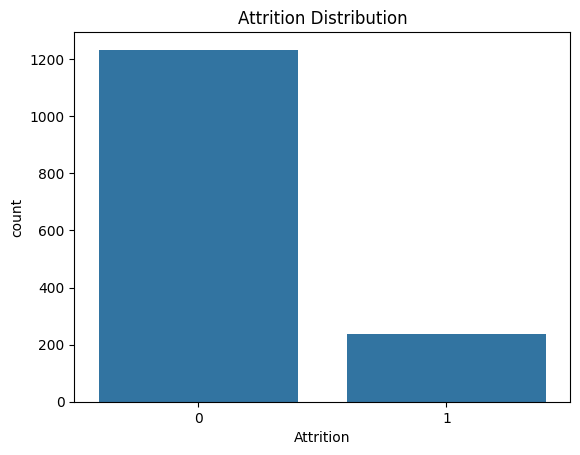

In [16]:
# Countplot for Attrition
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Distribution')
plt.show()

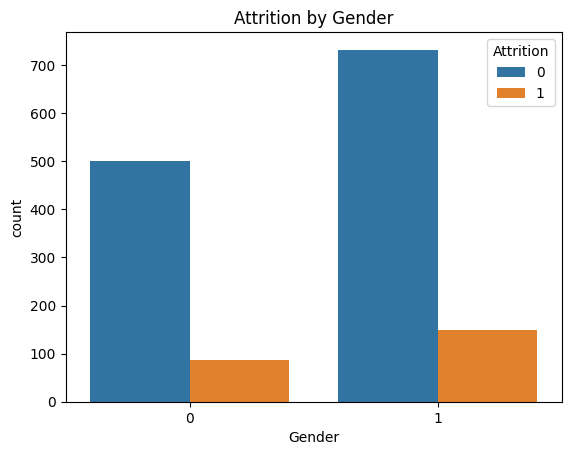

In [17]:
# Attrition by Gender
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title('Attrition by Gender')
plt.show()

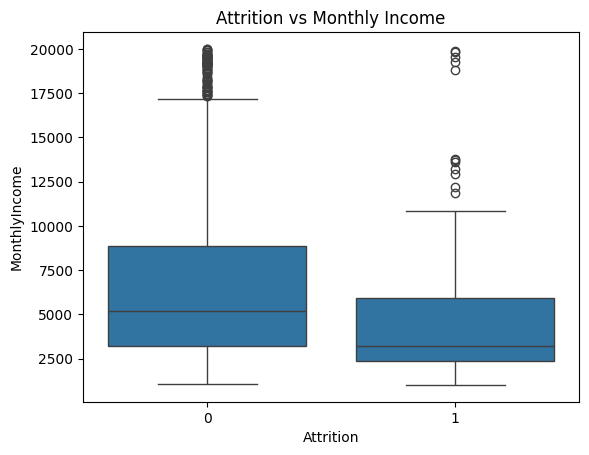

In [18]:
# Attrition vs Monthly Income
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Attrition vs Monthly Income')
plt.show()

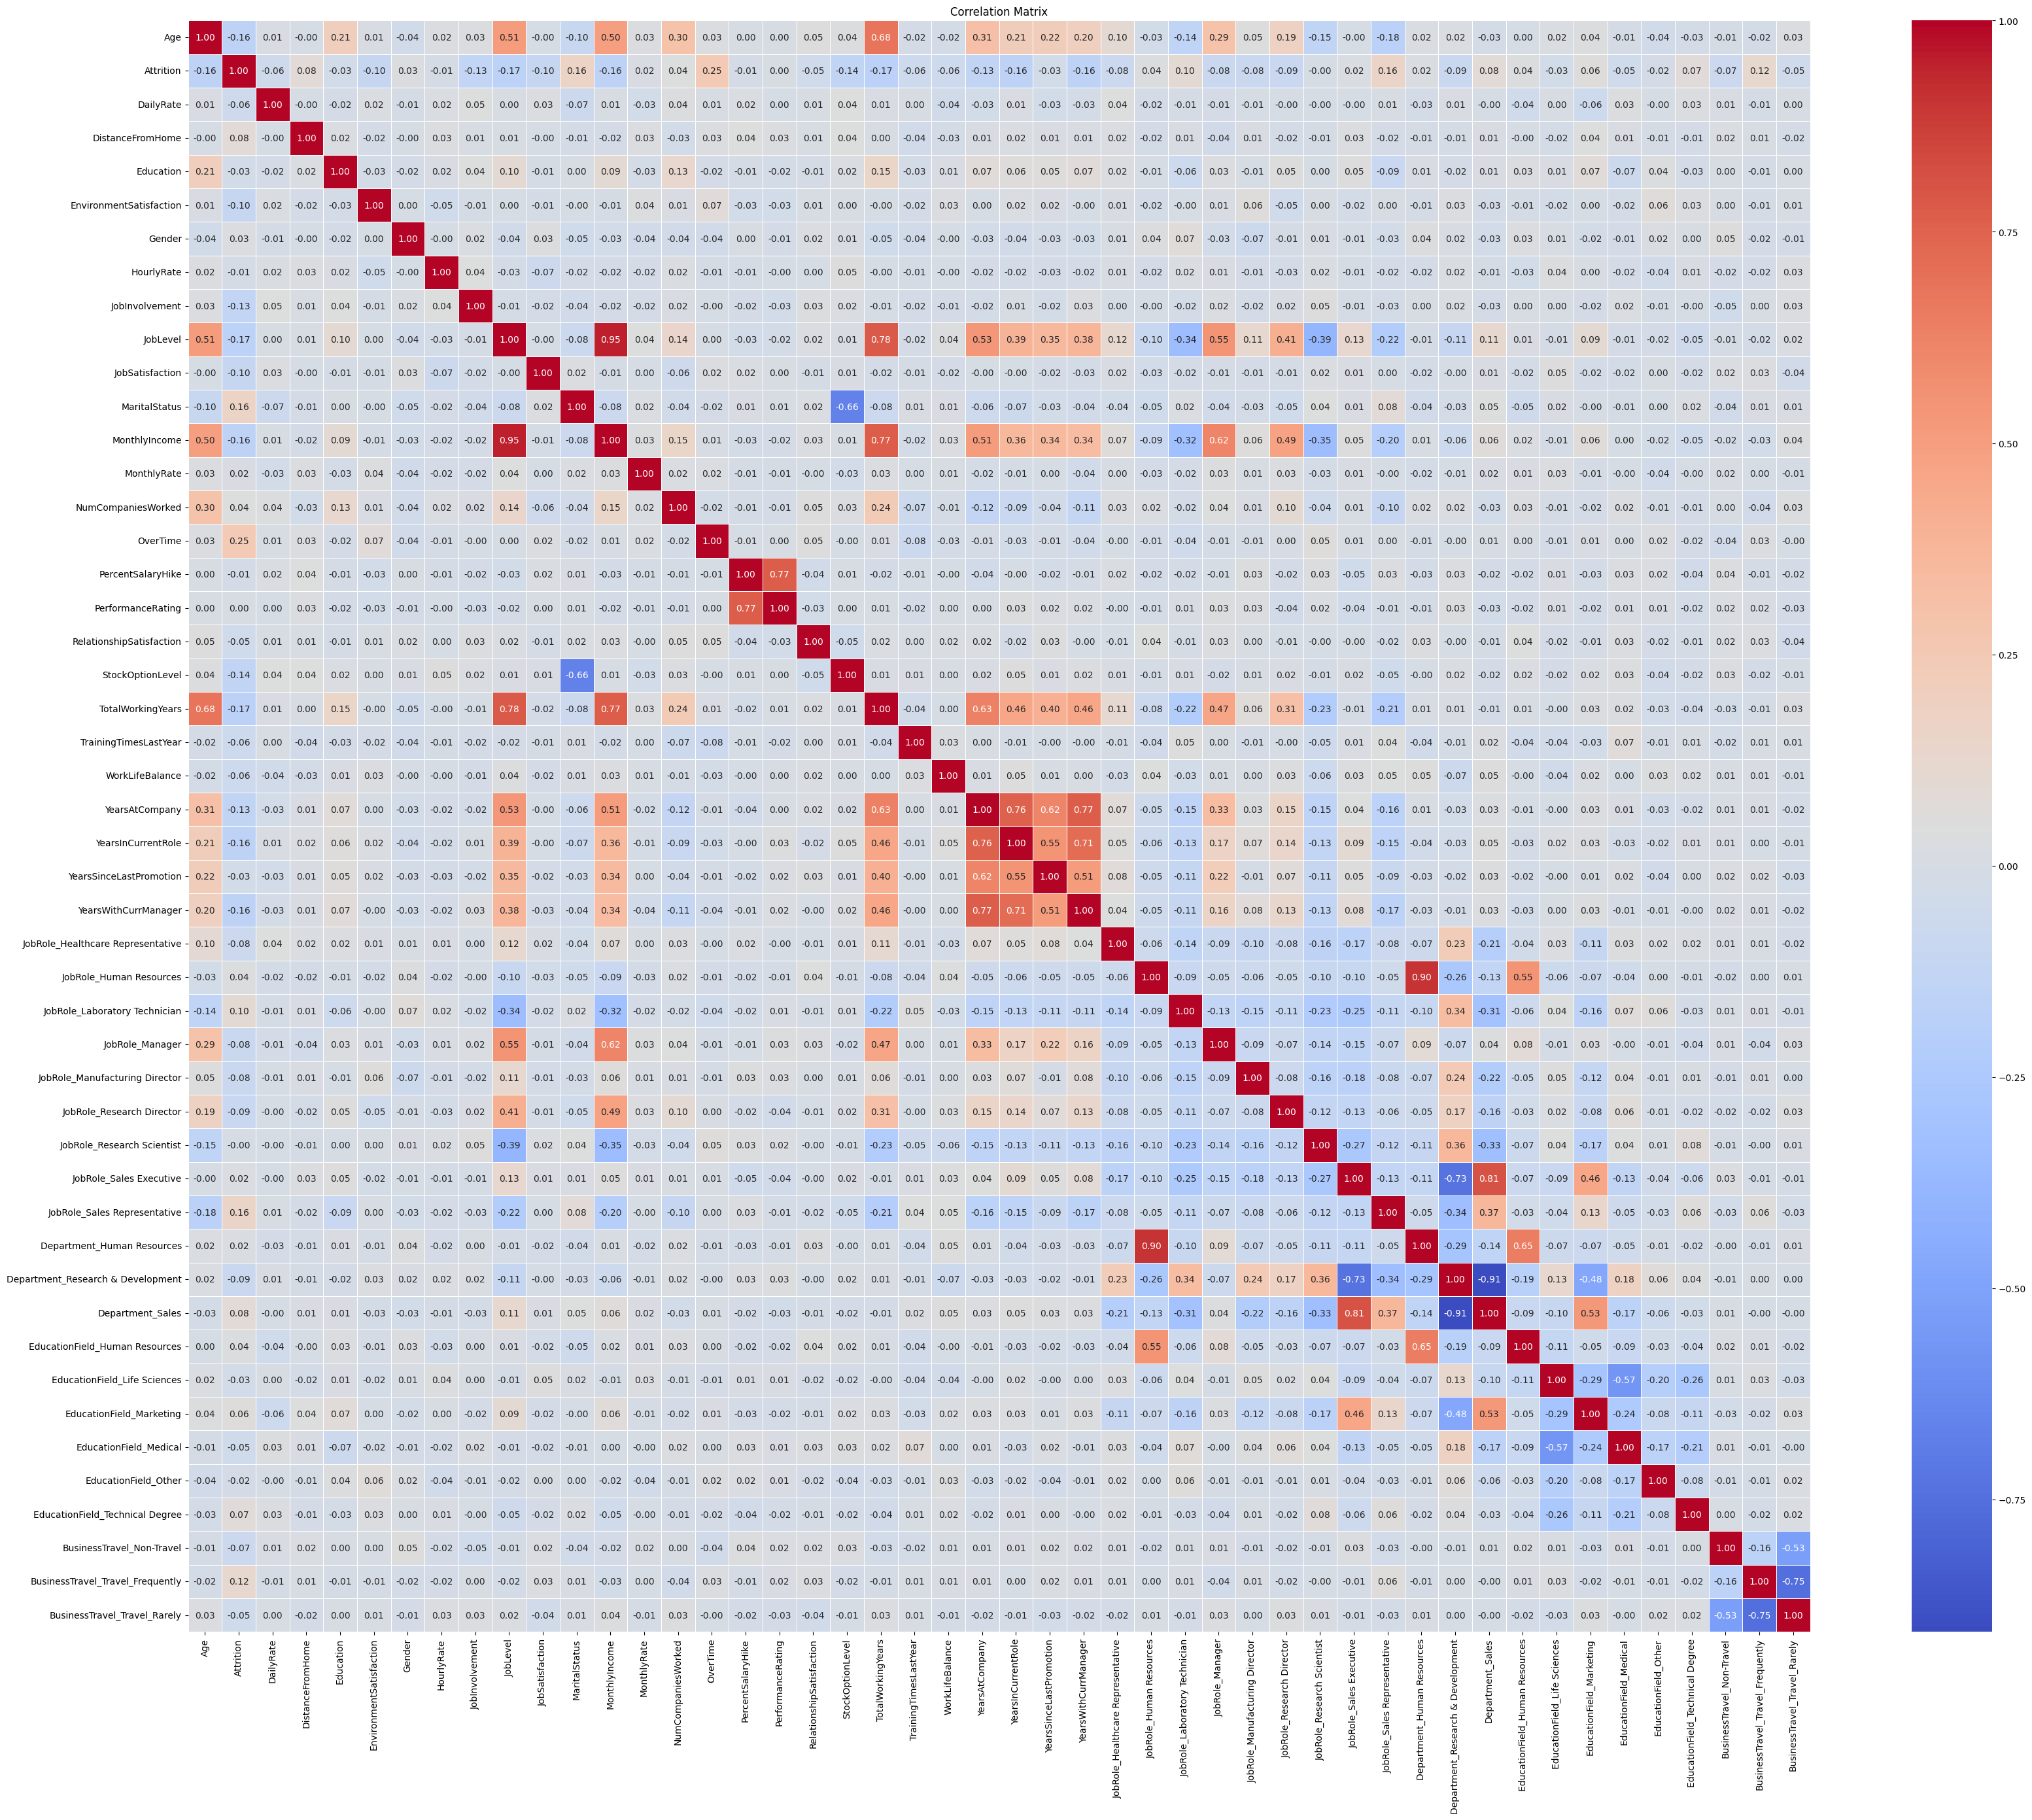

In [19]:
# Correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## 2. Performing Feature Engineering

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# Create tenure-related and income-related features
# Label Encoding for Attrition and OverTime (Binary variables)
label_encoder = LabelEncoder()

# Encode Attrition and OverTime (Yes = 1, No = 0)
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])


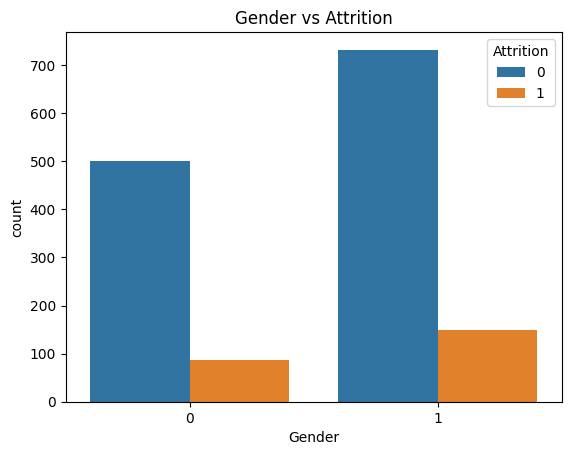

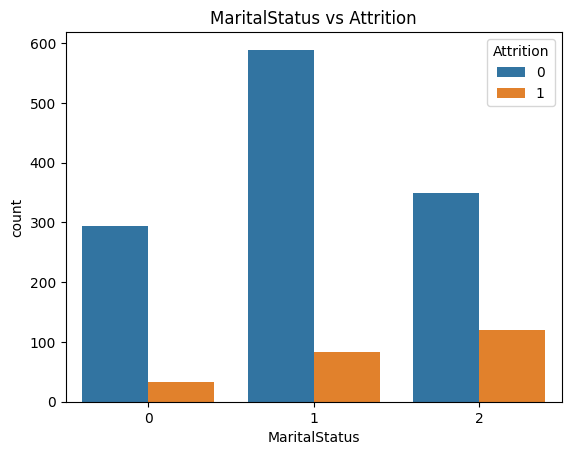

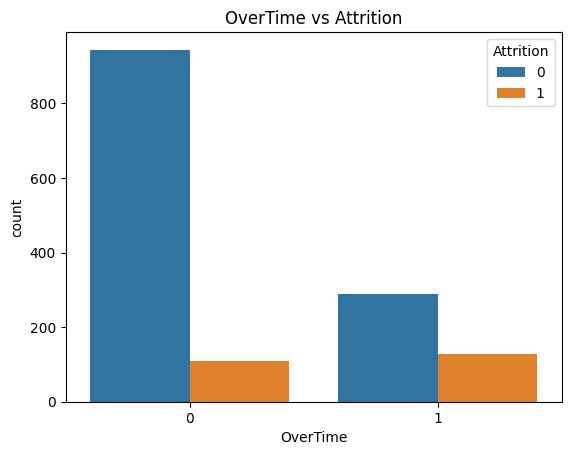

In [21]:
# Plot categorical variables against Attrition
categorical_columns = ['Gender', 'MaritalStatus', 'OverTime']

for column in categorical_columns:
    sns.countplot(x=column, hue='Attrition', data=data)
    plt.title(f'{column} vs Attrition')
    plt.show()


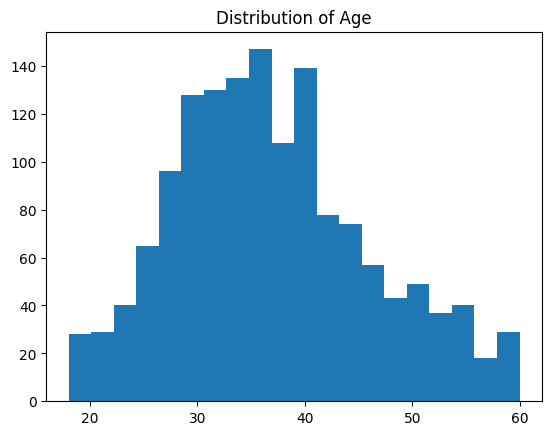

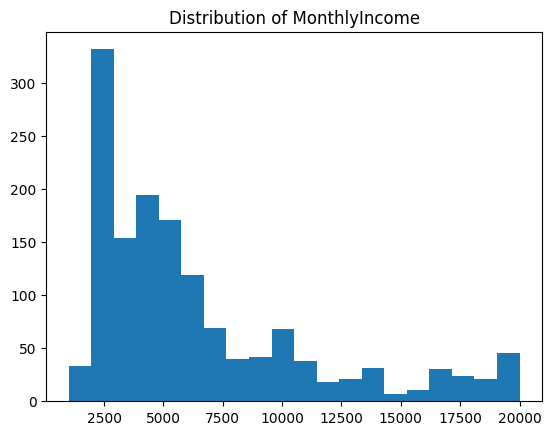

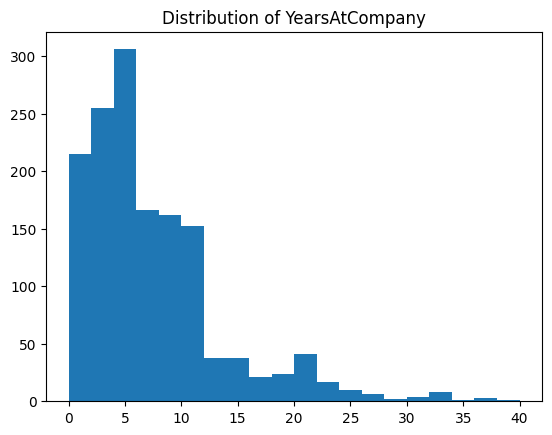

In [22]:
# Plot histograms for numerical features
numerical_columns = ['Age', 'MonthlyIncome', 'YearsAtCompany']

for column in numerical_columns:
    plt.hist(data[column], bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

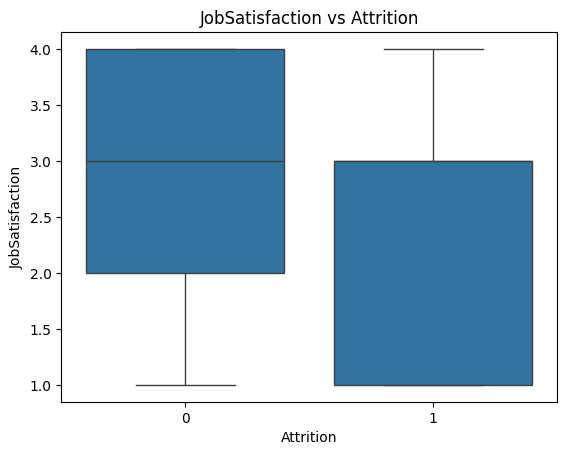

In [23]:
# Boxplot for JobSatisfaction vs Attrition
sns.boxplot(x='Attrition', y='JobSatisfaction', data=data)
plt.title('JobSatisfaction vs Attrition')
plt.show()

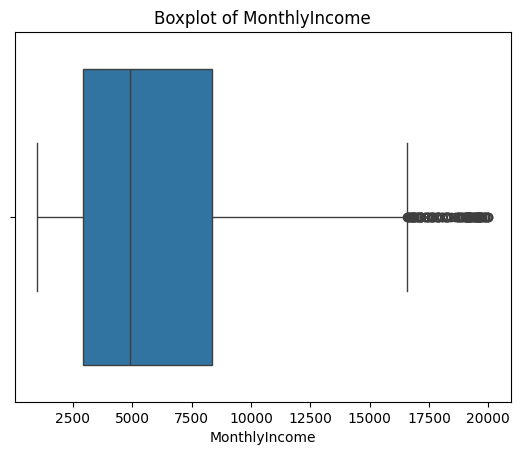

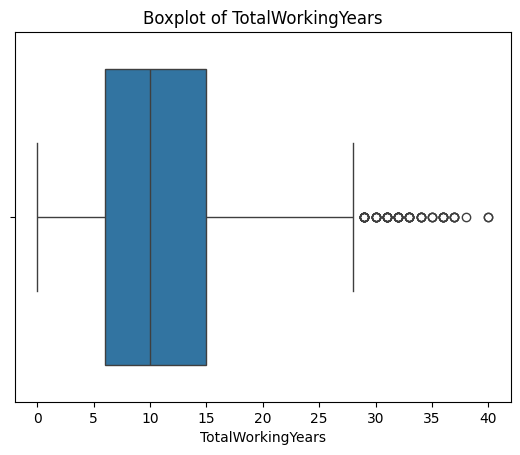

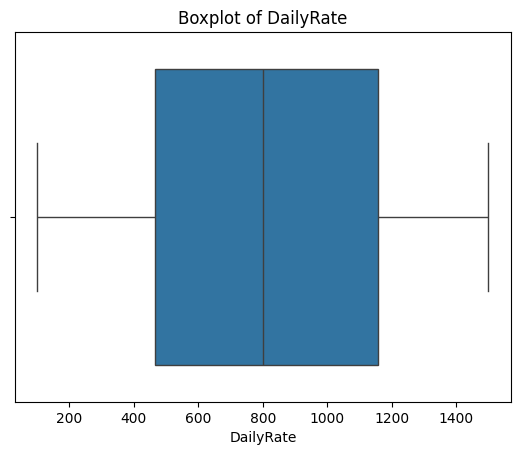

In [24]:
# Boxplot for outlier detection
numerical_columns = ['MonthlyIncome', 'TotalWorkingYears', 'DailyRate']

for column in numerical_columns:
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [25]:
data_copy=data.copy()

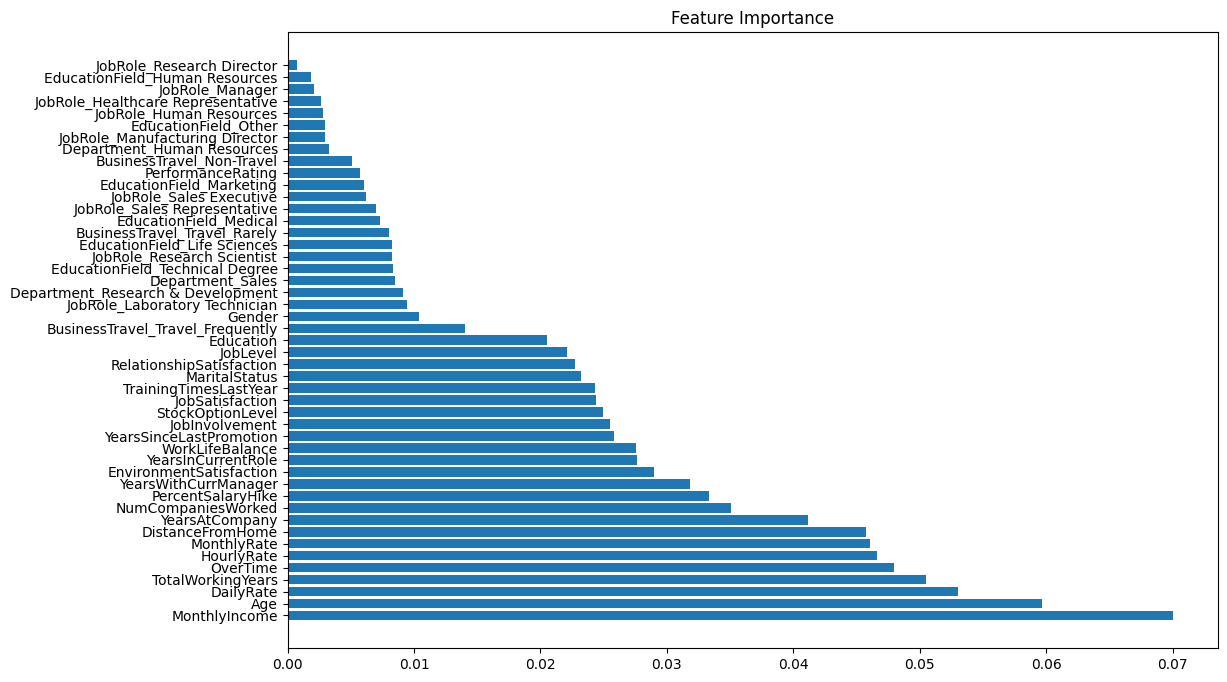

In [26]:
from sklearn.ensemble import RandomForestClassifier


# Separating features and target variable
X = data_copy.drop('Attrition', axis=1)
y = data_copy['Attrition']

# Training a Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Ploting feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Feature Importance')
plt.show()


## 2. Performing Feature Engineering

In [27]:
# Creating interaction feature
data['Satisfaction_Interaction'] = data['JobSatisfaction'] * data['WorkLifeBalance']

In [28]:
# Binning Age into categories
data['AgeBin'] = pd.cut(data['Age'], bins=[18, 30, 40, 50, 60], labels=['18-30', '31-40', '41-50', '51-60'])
# Binning YearsAtCompany into categories
data['YearsAtCompanyBin'] = pd.cut(data['YearsAtCompany'], bins=[0, 5, 10, 20, 30, 40], labels=['0-5', '6-10', '11-20', '21-30', '31-40'])

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Listing of numerical features to scale
numerical_features = ['MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome', 'DailyRate', 'Age']

# Applying scaling
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [30]:
# One-hot encoding for binned features
data = pd.get_dummies(data, columns=['AgeBin', 'YearsAtCompanyBin'], drop_first=True)

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)
poly_features = poly.fit_transform(data[numerical_features])

# Adding  these polynomial features to the original data
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_features))
data = pd.concat([data, poly_df], axis=1)

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10) 
pca_features = pca.fit_transform(data)

# Checking the explained variance ratio
print(pca.explained_variance_ratio_)

[9.99988568e-01 8.15758267e-06 1.48863882e-06 3.66967306e-07
 2.82188995e-07 2.65958174e-07 1.19075330e-07 1.08215463e-07
 7.25735959e-08 6.16803546e-08]


## 3. Applying Machine Learning Algorithm

In [33]:
from sklearn.model_selection import train_test_split

# 'Attrition' is the target variable and all other columns are features
x = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split data into training and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2, stratify=y)


In [34]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(x_train, y_train)

d:\Parvej Alam\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Predict on test set
y_pred_lr = lr_model.predict(x_test)

# Evaluate the model
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Classification Report:\n', classification_report(y_test, y_pred_lr))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8605442176870748
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       247
           1       0.59      0.43      0.49        47

    accuracy                           0.86       294
   macro avg       0.74      0.68      0.71       294
weighted avg       0.85      0.86      0.85       294

Confusion Matrix:
 [[233  14]
 [ 27  20]]


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Predict on test set
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8401360544217688
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.50      0.15      0.23        47

    accuracy                           0.84       294
   macro avg       0.68      0.56      0.57       294
weighted avg       0.80      0.84      0.80       294

Confusion Matrix:
 [[240   7]
 [ 40   7]]


In [38]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC()

# Train the model
svm_model.fit(x_train, y_train)


SVC()

In [39]:
# Predict on test set
y_pred_svm = svm_model.predict(x_test)

# Evaluate the model
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Classification Report:\n', classification_report(y_test, y_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.8401360544217688
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

Confusion Matrix:
 [[247   0]
 [ 47   0]]


d:\Parvej Alam\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Parvej Alam\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Parvej Alam\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [41]:
# Predict on test set
y_pred_gb = gb_model.predict(x_test)

# Evaluate the model
print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))
print('Classification Report:\n', classification_report(y_test, y_pred_gb))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.65      0.23      0.34        47

    accuracy                           0.86       294
   macro avg       0.76      0.60      0.63       294
weighted avg       0.83      0.86      0.83       294

Confusion Matrix:
 [[241   6]
 [ 36  11]]


In [42]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model with best hyperparameters
grid_search.fit(x_train, y_train)

# Best hyperparameters
print('Best Hyperparameters:', grid_search.best_params_)

# Predict with best model
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(x_test)

# Evaluate
print('Tuned Random Forest Accuracy:', accuracy_score(y_test, y_pred_best_rf))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=5, n_es

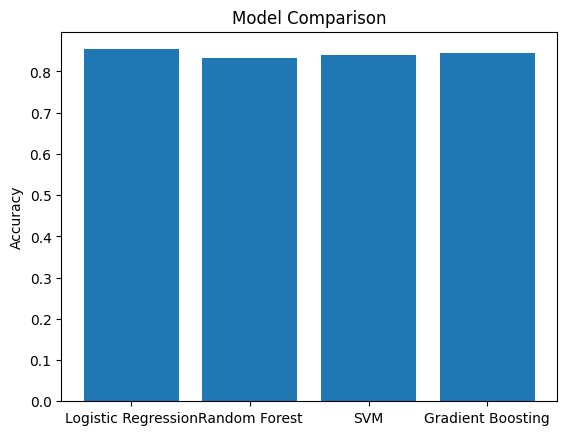

In [43]:
import matplotlib.pyplot as plt

# Example of a bar plot for comparison
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting']
accuracies = [0.8537414965986394, 0.8333333333333334, 0.8401360544217688, 0.8435374149659864]

plt.bar(models, accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.show()